In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
df_2007 = pd.read_csv("mls-salaries-2007.csv")
df_2008 = pd.read_csv("mls-salaries-2008.csv")
df_2009 = pd.read_csv("mls-salaries-2009.csv")
df_2010 = pd.read_csv("mls-salaries-2010.csv")
df_2011 = pd.read_csv("mls-salaries-2011.csv")
df_2012 = pd.read_csv("mls-salaries-2012.csv")
df_2013 = pd.read_csv("mls-salaries-2013.csv")
df_2014 = pd.read_csv("mls-salaries-2014.csv")
df_2015 = pd.read_csv("mls-salaries-2015.csv")
df_2016 = pd.read_csv("mls-salaries-2016.csv")
df_2017 = pd.read_csv("mls-salaries-2017.csv")
inflacao = pd.read_excel("inflação.xlsx")


In [5]:
df_2007['Ano'] = 2007
df_2008['Ano'] = 2008
df_2009['Ano'] = 2009
df_2010['Ano'] = 2010
df_2011['Ano'] = 2011
df_2012['Ano'] = 2012
df_2013['Ano'] = 2013
df_2014['Ano'] = 2014
df_2015['Ano'] = 2015
df_2016['Ano'] = 2016
df_2017['Ano'] = 2017

In [6]:
df_total = pd.concat([df_2007,df_2008,df_2009,df_2010,df_2011,df_2012,df_2013,df_2014,df_2015,df_2016,df_2017])
df_total

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Ano
0,CHI,Armas,Chris,M,225000.0,225000.00,2007
1,CHI,Banner,Michael,M,12900.0,12900.00,2007
2,CHI,Barrett,Chad,F,41212.5,48712.50,2007
3,CHI,Blanco,Cuauhtemoc,F,2492316.0,2666778.00,2007
4,CHI,Brown,C.J.,D,106391.0,106391.00,2007
...,...,...,...,...,...,...,...
611,VAN,Tornaghi,Paolo,GK,80000.0,80000.00,2017
612,VAN,Waston,Kendall,D,350000.0,368125.00,2017
613,VAN,Williams,Sheanon,D,175000.0,184000.00,2017
614,NaN,Babouli,Mo,F,54075.0,54075.00,2017


Text(0, 0.5, 'Salary')

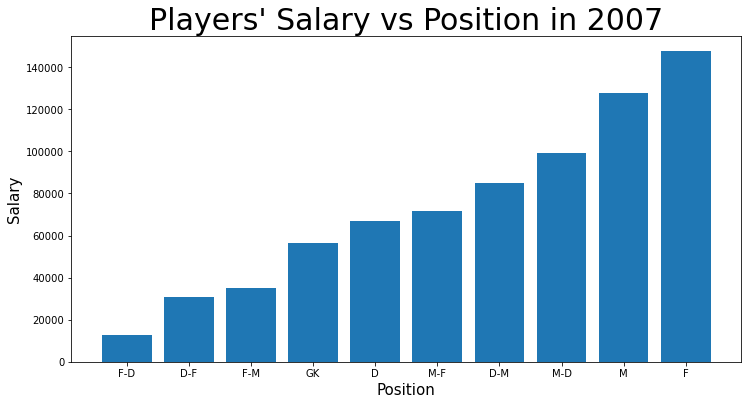

In [42]:
janela,grafico = plt.subplots(figsize=(12,6))


pd.set_option("display.precision",2)
#grafico.bar(,df_2007[['position','base_salary']].groupby(['position']).mean())


df_agrupado = df_2007[['position','base_salary']].groupby(['position']).mean().reset_index().sort_values(by="base_salary")

grafico.bar(df_agrupado['position'],df_agrupado['base_salary'])
grafico.set_title("Players' Salary vs Position in 2007",{"fontsize":30})
grafico.set_xlabel("Position",{"fontsize":15})
grafico.set_ylabel("Salary",{"fontsize":15})

In [33]:
lista_ano = df_total.groupby("Ano").mean()['base_salary'].index.to_list()

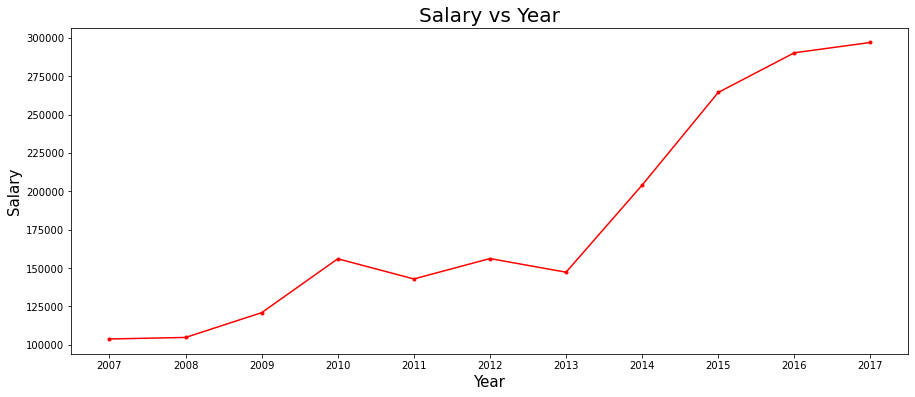

In [44]:
figura,ax = plt.subplots(figsize=(15,6))

grafico_linha = ax.plot(df_total.groupby("Ano").mean()['base_salary'],'r.-')
ax.set_title("Salary vs Year",{"fontsize":20})
ax.set_xlabel("Year",{"fontsize":15})
ax.set_ylabel("Salary",{"fontsize":15})
ax.set_xticks(range(2007,2018)) #Colocando o tamanho do x tick
ax.set_xticklabels(lista_ano) #Colocando quem são os x tick
pd.set_option("display.precision",2)

In [66]:
pd.options.display.float_format = '{:.2f}'.format
df_agrupado = df_total.groupby("Ano").sum()['base_salary']
#df_agrupado ['Diferença entra anos'] = df_agrupado.diff()
df_agrupado.diff().values
type(df_agrupado)


pandas.core.series.Series

In [67]:
df_agrupado = pd.DataFrame(df_agrupado)

In [63]:
df_agrupado['Diferença'] = df_agrupado.diff().values

In [68]:
df_agrupado['Variação por Ano'] = df_agrupado.pct_change()

In [69]:
df_agrupado

,base_salary,Variação por Ano
Ano,,
2007,38478332.43,NaN
2008,42929497.46,0.12
2009,46899197.53,0.09
2010,64108946.40,0.37
2011,74991075.63,0.17
2012,86492798.07,0.15
2013,84809199.15,-0.02
2014,116692405.08,0.38
2015,151767143.96,0.30


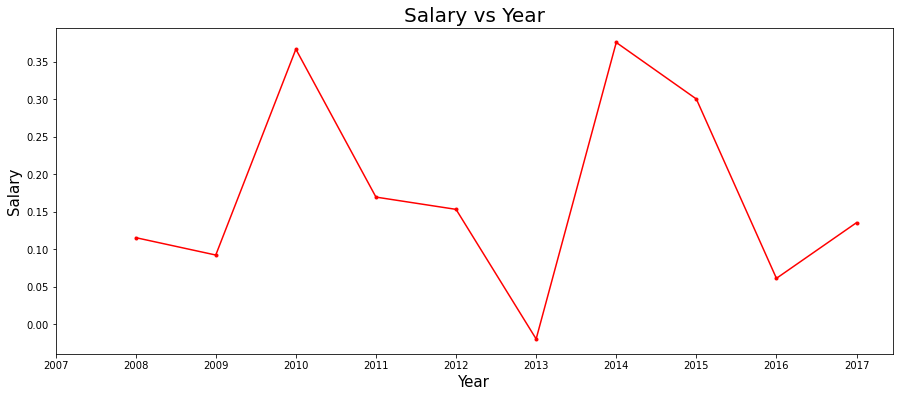

In [74]:
figura,ax = plt.subplots(figsize=(15,6))

grafico_linha = ax.plot(df_agrupado.index,df_agrupado['Variação por Ano'],'r.-')
ax.set_title("Salary vs Year",{"fontsize":20})
ax.set_xlabel("Year",{"fontsize":15})
ax.set_ylabel("Salary",{"fontsize":15})
ax.set_xticks(range(2007,2018)) #Colocando o tamanho do x tick
ax.set_xticklabels(lista_ano) #Colocando quem são os x tick
pd.set_option("display.precision",2)

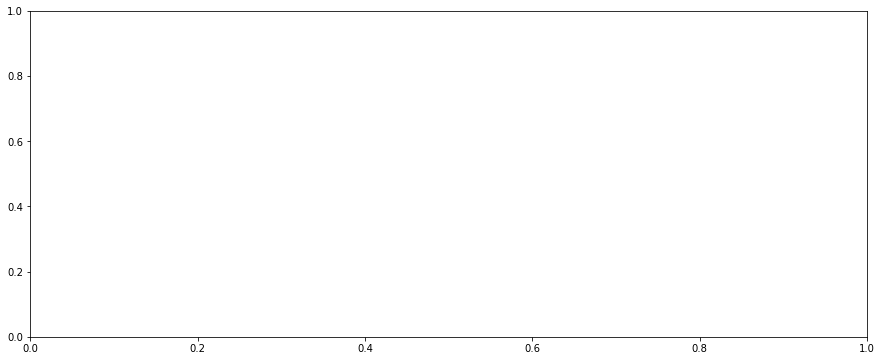

In [75]:
figura,ax = plt.subplots(figsize=(15,6))

In [82]:
df_total.groupby(["club",'Ano']).sum()['base_salary'].reset_index()

,club,Ano,base_salary
0,ATL,2016,177012.00
1,ATL,2017,8035616.04
2,CHI,2007,4412517.50
3,CHI,2008,4382546.92
4,CHI,2009,4721583.75
...,...,...,...
208,VAN,2013,4279508.04
209,VAN,2014,4542729.00
210,VAN,2015,5526615.04
211,VAN,2016,6012441.58


In [83]:
df_total.club.unique()

array(['CHI', 'CHV', 'CLB', 'COL', 'DAL', 'DC', 'HOU', 'KC', 'LA', 'NE',
       'NY', 'Pool', 'RSL', 'TFC', 'SJ', 'SEA', 'PHI', 'None', 'VAN',
       'POR', 'TOR', 'POOL', 'MTL', nan, 'ORL', 'NYCFC', 'ATL', 'NYRB',
       'LAFC', 'MNUFC'], dtype=object)

In [1]:
df_campeoes = pd.read_excel("campeoes mls.xlsx")

NameError: name 'pd' is not defined

In [104]:
df_campeoes.replace(["Los Angeles Galaxy",'DC United','Real Salt Lake',
                     'New England Revolution','Seattle Sounders FC','Houston Dynamo',
                    'San Jose Earthquakes','Sporting Kansas City','Columbus Crew','Seattle Sounders',
                     'New York Red Bulls','D.C. United','Colorado Rapids','FC Dallas','Portland Timbers','Toronto FC'],
                    ['LA','DC','RSL','NE','SEA','HOU','SJ','KC','CLB','SEA','NYRB','DC','COL','DAL','POR','TOR'],inplace=True)


In [107]:
df_salary_campeoes = pd.merge(df_total,df_campeoes,how='left')
df_salary_campeoes

,club,last_name,first_name,position,base_salary,guaranteed_compensation,Ano,MLS Cup,MLS Supporters' Shield,U.S. Open Cup *
0,CHI,Armas,Chris,M,225000.00,225000.00,2007,HOU,DC,NE
1,CHI,Banner,Michael,M,12900.00,12900.00,2007,HOU,DC,NE
2,CHI,Barrett,Chad,F,41212.50,48712.50,2007,HOU,DC,NE
3,CHI,Blanco,Cuauhtemoc,F,2492316.00,2666778.00,2007,HOU,DC,NE
4,CHI,Brown,C.J.,D,106391.00,106391.00,2007,HOU,DC,NE
...,...,...,...,...,...,...,...,...,...,...
5548,VAN,Tornaghi,Paolo,GK,80000.00,80000.00,2017,TOR,TOR,KC
5549,VAN,Waston,Kendall,D,350000.00,368125.00,2017,TOR,TOR,KC
5550,VAN,Williams,Sheanon,D,175000.00,184000.00,2017,TOR,TOR,KC
5551,NaN,Babouli,Mo,F,54075.00,54075.00,2017,TOR,TOR,KC
